In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

**Generate Data for sampling:**

True Function:  $y = \sin(2x)

Generated Data (synthetic) : $y = \sin(2x) + noise

          X         y
0  0.000000  0.149014
1  0.050505  0.059359
2  0.101010  0.394955
3  0.151515  0.755323
4  0.202020  0.322891
5  0.252525  0.413611
6  0.303030  1.043398
7  0.353535  0.879840
8  0.404040  0.582120
9  0.454545  0.951713


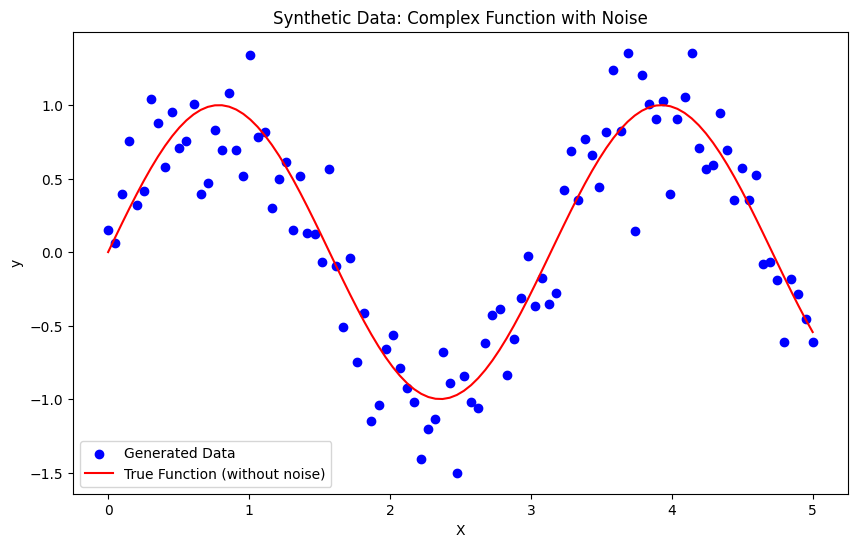

In [ ]:
# Let's retry the code to generate and visualize the synthetic data.
# Step 1: Generate Complex Synthetic Data
np.random.seed(42)
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.3, size=X.shape[0])
#y = np.sin(X).ravel() + 0.5 * X.ravel() ** 2 + np.random.normal(scale=0.5, size=X.shape[0])

# Create a DataFrame to display the X and y data
data = pd.DataFrame({'X': X.ravel(),'y': y})
# Display the first few rows of the data in a table
print(data.head(10))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Generated Data')
# plt.plot(X, np.sin(X).ravel() + 0.5 * X.ravel() ** 2, color='red', label='True Function (without noise)')
plt.plot(X, np.sin(2*X).ravel(), color='red', label='True Function (without noise)')
#np.sin(2 * X).ravel()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data: Complex Function with Noise')
plt.legend()
plt.show()

In [ ]:
# Step 2: Define a function to calculate bias, variance, and MSE
def calculate_bias_variance(model, X, y_true, n_simulations=100):
    y_preds = np.zeros((n_simulations, len(X)))

    for i in range(n_simulations):
        y_sim = y_true + np.random.normal(scale=0.5, size=len(y_true))
        model.fit(X, y_sim)
        y_preds[i] = model.predict(X)

    y_pred_mean = np.mean(y_preds, axis=0)
    bias = np.mean((y_pred_mean - y_true) ** 2)
    variance = np.mean(np.var(y_preds, axis=0))

    return bias, variance

In [ ]:
# Step 3: Train and Evaluate Models with different complexities
degrees = [1, 4, 15]  # Complexity levels (linear, moderate, high)
models = [make_pipeline(PolynomialFeatures(degree=d), LinearRegression()) for d in degrees]
biases, variances, mses = [], [], []

for model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    bias, variance = calculate_bias_variance(model, X, y)

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

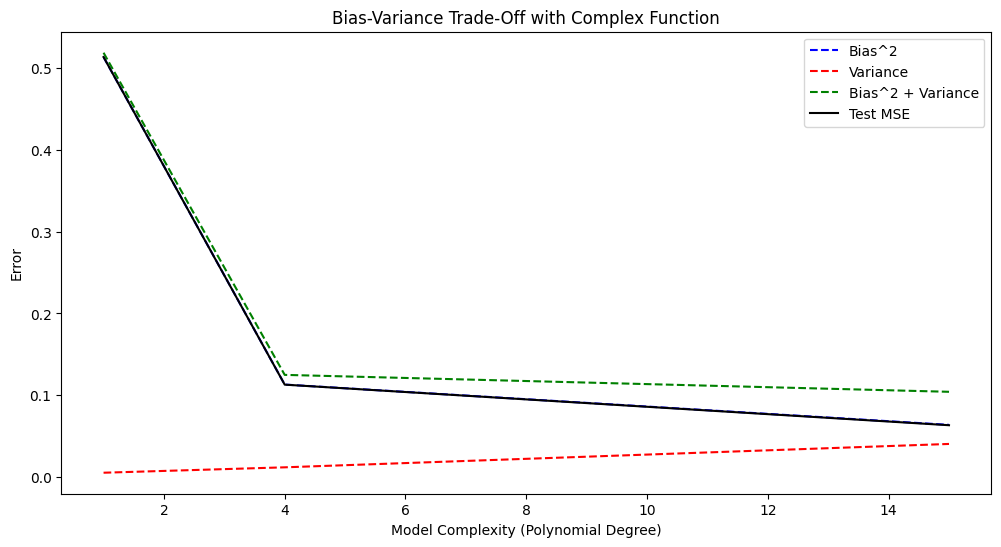

Biases: [0.5134540136933088, 0.1130135485056074, 0.06375068704127568]
Variances: [0.005239191362174181, 0.011841516533035225, 0.040419650168481126]
MSEs: [0.5134535949788687, 0.11290987833952247, 0.06330797542545874]


In [ ]:
# Step 4: Plotting U-Shaped Curves
plt.figure(figsize=(12, 6))

# Plot Bias^2, Variance, and MSE
plt.plot(degrees, biases, 'b--', label='Bias^2')
plt.plot(degrees, variances, 'r--', label='Variance')
plt.plot(degrees, [b + v for b, v in zip(biases, variances)], 'g--', label='Bias^2 + Variance')
plt.plot(degrees, mses, 'k-', label='Test MSE')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-Off with Complex Function')
plt.legend()
plt.show()

# Step 5: Analysis of Outcome
print(f"Biases: {biases}")
print(f"Variances: {variances}")
print(f"MSEs: {mses}")


In [ ]:
print(analysis)

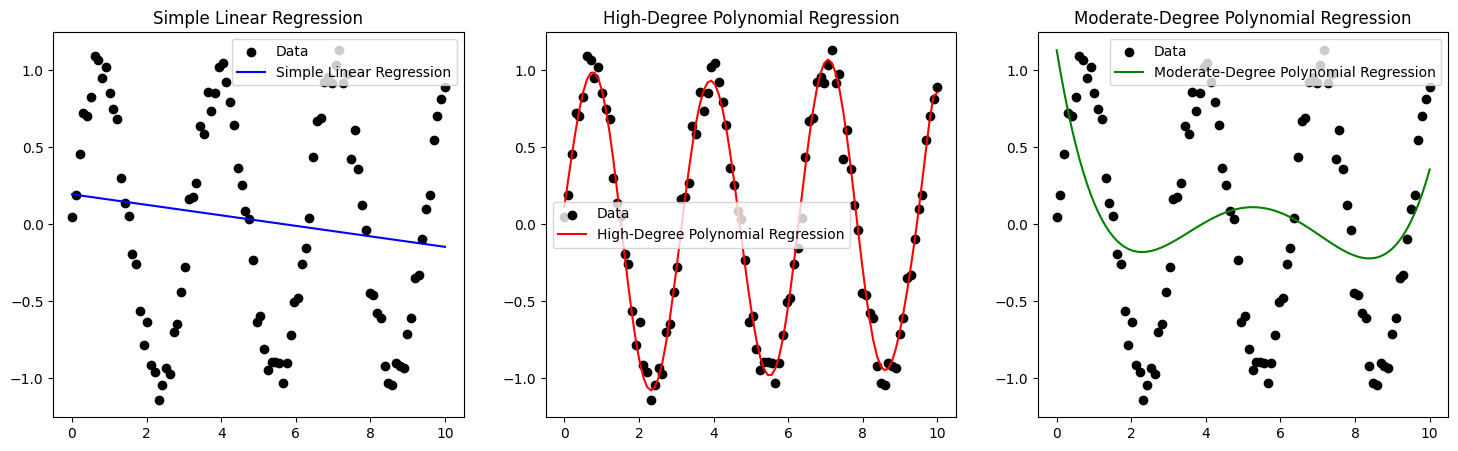

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Step 1: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Step 2: Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=15), LinearRegression()), 'red'),
]

# Step 3: Plot Each Model's Prediction
plt.figure(figsize=(18, 5))

for i, (title, model, color) in enumerate(models, 1):
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='black', label='Data')
    plt.plot(X, y_pred, color=color, label=f'{title}')
    plt.title(title)
    plt.legend()

plt.show()


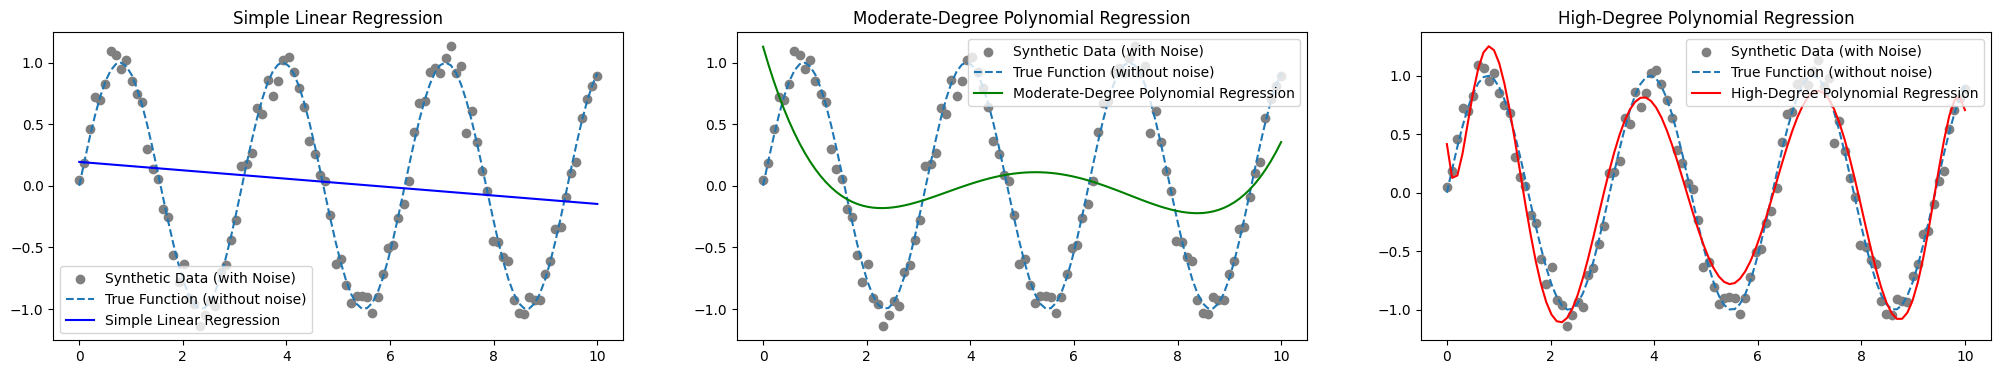

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y_true, n_simulations=100):
    y_preds = np.zeros((n_simulations, len(X)))

    for i in range(n_simulations):
        y_sim = y_true + np.random.normal(scale=0.1, size=len(y_true))
        model.fit(X, y_sim)
        y_preds[i] = model.predict(X)

    y_pred_mean = np.mean(y_preds, axis=0)
    bias = np.mean((y_pred_mean - y_true) ** 2)
    variance = np.mean(np.var(y_preds, axis=0))

    return bias, variance

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=10), LinearRegression()), 'red'),
  ]

# Initialize lists to store the results
results = []

# Train each model and calculate Bias, Variance, and MSE
for title, model, color in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    bias, variance = calculate_bias_variance(model, X, y)
    results.append((title, bias, variance, mse))

# Display the results in a tabular form
df_results = pd.DataFrame(results, columns=["Model", "Bias^2", "Variance", "MSE"])
df_results.set_index("Model", inplace=True)
df_results


#Plot Each Model's Prediction
plt.figure(figsize=(25, 4))

for i, (title, model, color) in enumerate(models, 1):
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='gray', label='Synthetic Data (with Noise)')
    plt.plot(X, np.sin(2*X).ravel(), label='True Function (without noise)', linestyle='--')
    plt.plot(X, y_pred, color=color, label=f'{title}')
    plt.title(title)
    plt.legend()

plt.show()

                                       Train Bias^2  Train Variance  \
Model                                                                 
Simple Linear Regression                   0.475538        0.000213   
Moderate-Degree Polynomial Regression      0.426504        0.000533   
High-Degree Polynomial Regression          0.023717        0.001216   

                                       Train MSE  Test Bias^2  Test Variance  \
Model                                                                          
Simple Linear Regression                0.475538     0.957287       0.000459   
Moderate-Degree Polynomial Regression   0.426498     2.453701       0.005815   
High-Degree Polynomial Regression       0.023703    39.233306       0.516037   

                                        Test MSE  
Model                                             
Simple Linear Regression                0.959634  
Moderate-Degree Polynomial Regression   2.467349  
High-Degree Polynomial Regression      

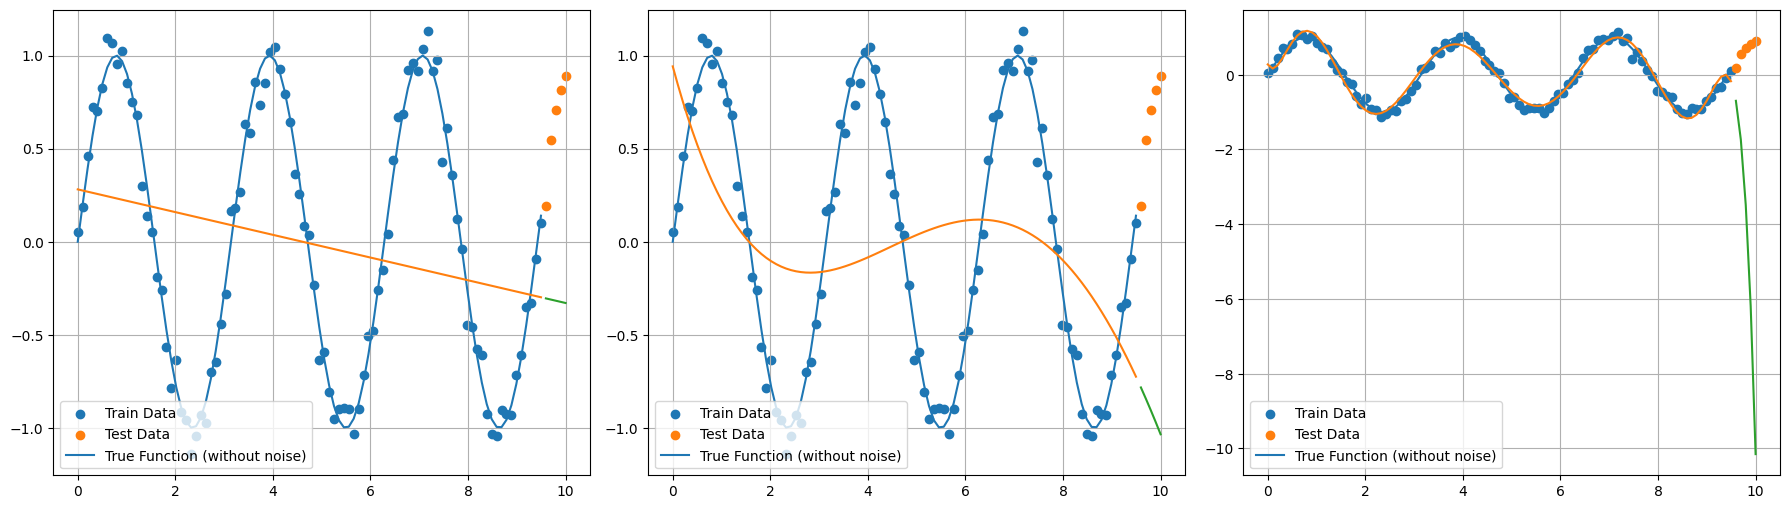

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X_train, y_train, X_test, y_test, n_simulations=100):
    y_preds_train = np.zeros((n_simulations, len(X_train)))
    y_preds_test = np.zeros((n_simulations, len(X_test)))

    for i in range(n_simulations):
        y_train_sim = y_train + np.random.normal(scale=0.1, size=len(y_train))
        model.fit(X_train, y_train_sim)
        y_preds_train[i] = model.predict(X_train)
        y_preds_test[i] = model.predict(X_test)

    y_pred_train_mean = np.mean(y_preds_train, axis=0)
    y_pred_test_mean = np.mean(y_preds_test, axis=0)

    bias_train = np.mean((y_pred_train_mean - y_train) ** 2)
    bias_test = np.mean((y_pred_test_mean - y_test) ** 2)

    variance_train = np.mean(np.var(y_preds_train, axis=0))
    variance_test = np.mean(np.var(y_preds_test, axis=0))

    return bias_train, variance_train, bias_test, variance_test

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Use first 95 data points for training and the last 5 for testing
X_train, X_test = X[:95], X[95:]
y_train, y_test = y[:95], y[95:]

# Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=10), LinearRegression()), 'red'),
]

# Initialize lists to store the results
results = []

# Train each model and calculate Bias, Variance, and MSE for both training and test sets
for title, model, color in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    bias_train, variance_train, bias_test, variance_test = calculate_bias_variance(model, X_train, y_train, X_test, y_test)

    results.append((title, bias_train, variance_train, mse_train, bias_test, variance_test, mse_test))

# Display the results in a tabular form
df_results = pd.DataFrame(results, columns=["Model", "Train Bias^2", "Train Variance", "Train MSE", "Test Bias^2", "Test Variance", "Test MSE"])
df_results.set_index("Model", inplace=True)
print(df_results)

# Plot Each Model's Prediction for Training Data
plt.figure(figsize=(18, 10))

for i, (title, model, color) in enumerate(models, 1):
    plt.subplot(2, 3, i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.scatter(X_train, y_train, label='Train Data')
    plt.scatter(X_test, y_test, label='Test Data')
    plt.plot(X_train, np.sin(2 * X_train).ravel(), label='True Function (without noise)')
    plt.plot(X_train, y_train_pred)
    plt.plot(X_test, y_test_pred)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


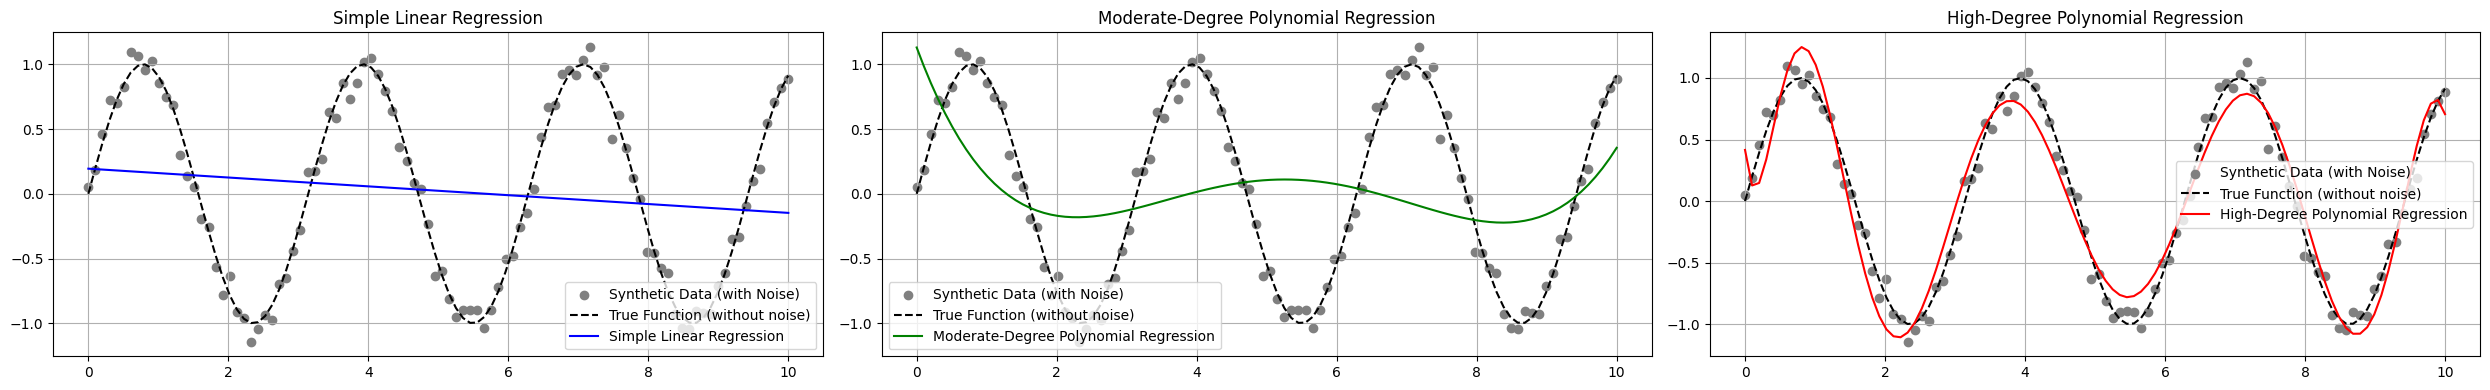

                                         Bias^2  Variance       MSE
Model                                                              
Simple Linear Regression               0.491363  0.000210  0.491363
Moderate-Degree Polynomial Regression  0.440213  0.000474  0.440209
High-Degree Polynomial Regression      0.033807  0.001110  0.033793


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y_true, n_simulations=100):
    y_preds = np.zeros((n_simulations, len(X)))

    for i in range(n_simulations):
        y_sim = y_true + np.random.normal(scale=0.1, size=len(y_true))
        model.fit(X, y_sim)
        y_preds[i] = model.predict(X)

    y_pred_mean = np.mean(y_preds, axis=0)
    bias = np.mean((y_pred_mean - y_true) ** 2)
    variance = np.mean(np.var(y_preds, axis=0))

    return bias, variance

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=10), LinearRegression()), 'red'),
  ]

# Initialize lists to store the results
results = []

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X, y_true, n_simulations=100):
    y_preds = np.zeros((n_simulations, len(X)))

    for i in range(n_simulations):
        y_sim = y_true + np.random.normal(scale=0.1, size=len(y_true))
        model.fit(X, y_sim)
        y_preds[i] = model.predict(X)

    y_pred_mean = np.mean(y_preds, axis=0)
    bias = np.mean((y_pred_mean - y_true) ** 2)
    variance = np.mean(np.var(y_preds, axis=0))

    return bias, variance

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=10), LinearRegression()), 'red'),
]

# Initialize list to store the results
results = []

# Train each model, calculate Bias, Variance, MSE, and plot predictions
plt.figure(figsize=(25, 4))

for i, (title, model, color) in enumerate(models, 1):
    # Train the model
    model.fit(X, y)

    # Predictions
    y_pred = model.predict(X)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)

    # Calculate Bias and Variance
    bias, variance = calculate_bias_variance(model, X, y)

    # Store the results
    results.append((title, bias, variance, mse))

    # Plot the model's prediction
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='gray', label='Synthetic Data (with Noise)')
    plt.plot(X, np.sin(2 * X).ravel(), linestyle='--', color='black', label='True Function (without noise)')
    plt.plot(X, y_pred, color=color, label=f'{title}')
    plt.title(title)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display the results in a tabular form
df_results = pd.DataFrame(results, columns=["Model", "Bias^2", "Variance", "MSE"])
df_results.set_index("Model", inplace=True)
print(df_results)


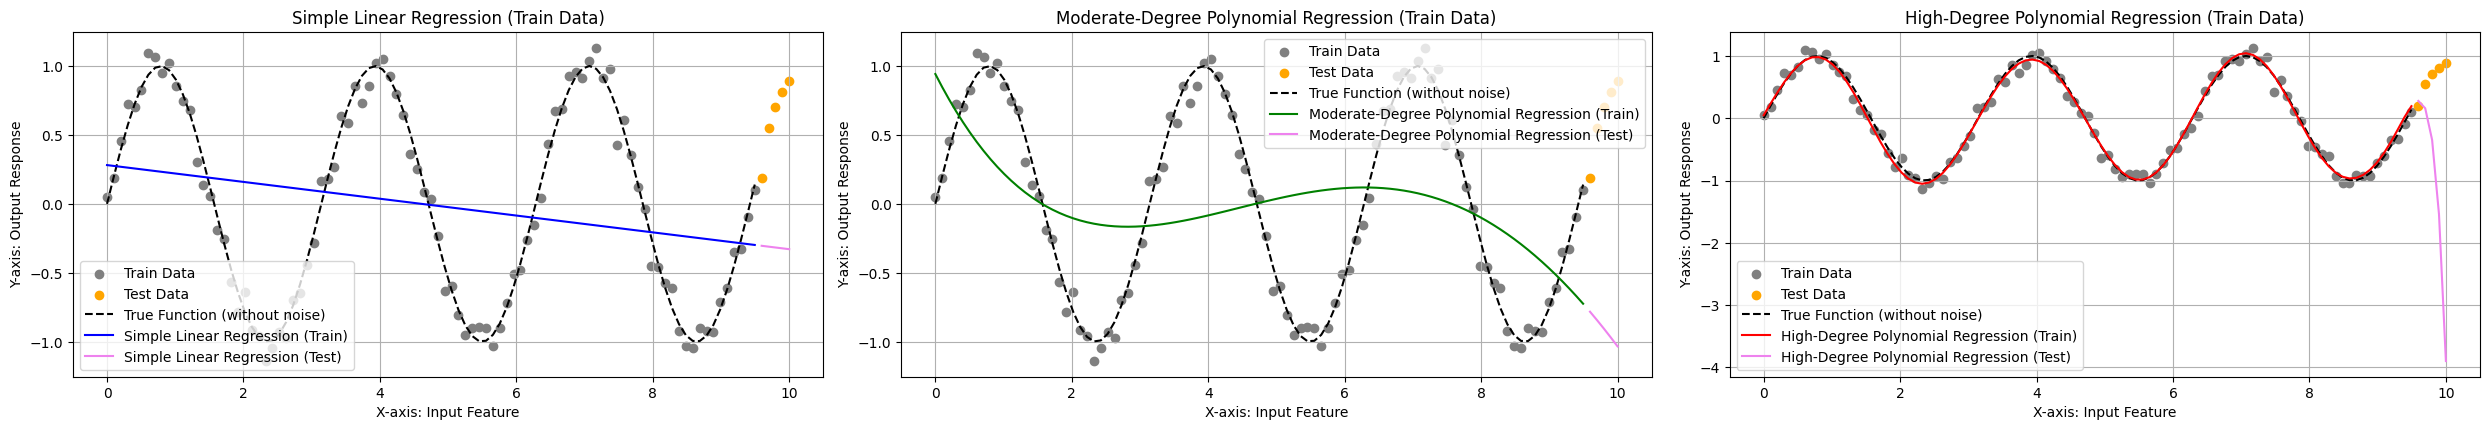

                                       Train Bias^2  Test Bias^2  \
Model                                                              
Simple Linear Regression                   0.475538     0.000213   
Moderate-Degree Polynomial Regression      0.426504     0.000533   
High-Degree Polynomial Regression          0.007819     0.001541   

                                       Train Variance  Test Variance  \
Model                                                                  
Simple Linear Regression                     0.475538       0.957287   
Moderate-Degree Polynomial Regression        0.426498       2.453701   
High-Degree Polynomial Regression            0.008040       7.887742   

                                       Train MSE  Test MSE  
Model                                                       
Simple Linear Regression                0.000459  0.959634  
Moderate-Degree Polynomial Regression   0.005815  2.467349  
High-Degree Polynomial Regression      13.332286  5.94

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Function to calculate bias and variance
def calculate_bias_variance(model, X_train, y_train, X_test, y_test, n_simulations=100):
    y_preds_train = np.zeros((n_simulations, len(X_train)))
    y_preds_test = np.zeros((n_simulations, len(X_test)))

    for i in range(n_simulations):
        y_train_sim = y_train + np.random.normal(scale=0.1, size=len(y_train))
        model.fit(X_train, y_train_sim)
        y_preds_train[i] = model.predict(X_train)
        y_preds_test[i] = model.predict(X_test)

    y_pred_train_mean = np.mean(y_preds_train, axis=0)
    y_pred_test_mean = np.mean(y_preds_test, axis=0)

    bias_train = np.mean((y_pred_train_mean - y_train) ** 2)
    bias_test = np.mean((y_pred_test_mean - y_test) ** 2)

    variance_train = np.mean(np.var(y_preds_train, axis=0))
    variance_test = np.mean(np.var(y_preds_test, axis=0))

    return bias_train, variance_train, bias_test, variance_test

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Split data into training (first 95 points) and testing (last 5 points)
X_train, X_test = X[:95], X[95:]
y_train, y_test = y[:95], y[95:]

# Define Models with Different Complexities
models = [
    ("Simple Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()), 'blue'),
    ("Moderate-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High-Degree Polynomial Regression", make_pipeline(PolynomialFeatures(degree=15), LinearRegression()), 'red'),  # High-degree polynomial
]

# Initialize list to store the results
results = []

# Train each model, calculate Bias, Variance, MSE, and plot predictions
plt.figure(figsize=(25, 8))

for i, (title, model, color) in enumerate(models, 1):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions for both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Calculate Bias and Variance
    bias_train, variance_train, bias_test, variance_test = calculate_bias_variance(model, X_train, y_train, X_test, y_test)

    # Store the results
    results.append((title, bias_train, variance_train, mse_train, bias_test, variance_test, mse_test))

    # Plot the model's prediction on training data
    plt.subplot(2, 3, i)
    plt.scatter(X_train, y_train, color='gray', label='Train Data')
    plt.scatter(X_test, y_test, color='orange', label='Test Data')
    plt.plot(X_train, np.sin(2 * X_train).ravel(), linestyle='--', color='black', label='True Function (without noise)')
    plt.plot(X_train, y_train_pred, color=color, label=f'{title} (Train)')
    plt.plot(X_test, y_test_pred, color= 'violet', label=f'{title} (Test)')
    plt.title(f'{title} (Train Data)')
    plt.xlabel("X-axis: Input Feature")
    plt.ylabel("Y-axis: Output Response")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Display the results in a tabular form
df_results = pd.DataFrame(results, columns=["Model", "Train Bias^2", "Test Bias^2", "Train Variance","Test Variance",  "Train MSE", "Test MSE"])
df_results.set_index("Model", inplace=True)
print(df_results)


# **Question 1: Develop a one dimensional example to demonstrate how bias variance tradeoff occurs with different model complexities using synthetic data.**


---





**Interpretation of the Question**:

The task is to create a clear and illustrative example using simulated data (synthetic data) to demonstrate how different levels of model complexity affect prediction errors. The idea is to demonstrate with examples that how simpler models might miss important patterns (high bias) and how overly complex models might focus too much on the details of the training data (high variance), ultimately leading to poor performance on new, unseen data (overfitting).

The term "one-dimensional" in this context refers to single input variable (feature) in the data, making it easier to visualize and understand the impact of model complexity on prediction accuracy.

# **Response:**

---

The **bias-variance tradeoff** is an important idea in machine learning that shows the balance between how complex a model is Vs how accurate its predictions are:

**Bias:** This is about the mistakes that happen because of the assumptions the model makes. For example, a model with high bias, like a simple linear model, might make things too simple and miss the real patterns in the data, causing it to **underfit**.

**Variance**: This is about the mistakes that happen because the model is too sensitive to changes in the training data. A model with high variance, like a complex polynomial model, might end up fitting the noise in the training data too well, which can make it not perform well on new, unseen data, leading to **overfitting**.

In order to demostrate this, we will taking took following approch.
 (Step 2):

1.   **Generate Synthetic Data** : A one-dimensional dataset is fabricated using a sine function with some added noise to mimic real-world data. This will give a clear case where the actual pattern is known, making it easier to show how the model behaves.

2.   **Fit Models of Varying Complexities** : Three models with different levels of complexity will be fitted to the data i.e.
  *   Simple linear regression (low complexity, high bias)
  *   Moderate-degree polynomial regression (balanced bias and variance)
  *   High-degree polynomial regression (high complexity, low bias, high variance)

 This is to show how the complexity of the model affects its fitness the data.

3.   **Calculate Bias, Variance, and MSE** : For each model, the bias, variance, and MSE will be calculated. Aim would to present through these measurements the models' performance, showing how simpler models often underfit (high bias) and more complex models tend to overfit (high variance)

4.   **Plot and Analyse the Outcomes**: The outcomes will be shown using plots of bias, variance, and MSE for each model. Commentary will be given to back up the findings, confirming the bias-variance trade-off theory and stressing the need to choose the right model complexity for the best results.


**Step 1: Generate Synthetic Data** : A one-dimensional dataset is created using a sine function with added noise to simulate real-world data.
  *   True Function:  y = sin(2x)
  *   Generated Data (synthetic) : y = sin(2x) + noise

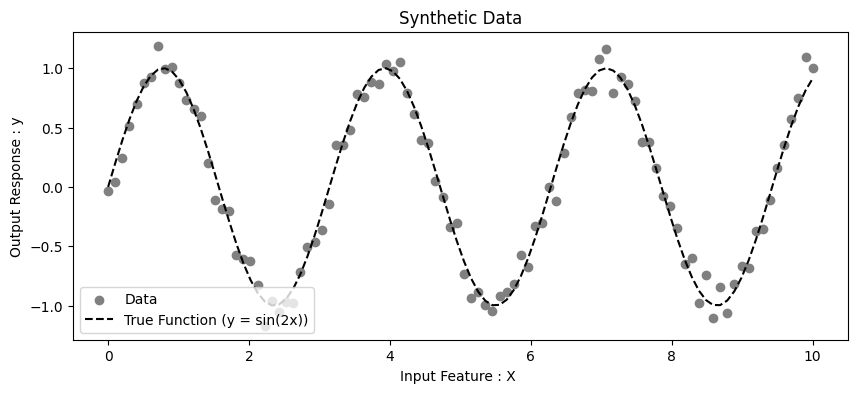

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(33)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(2 * X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])

# Plot
plt.figure(figsize=(10, 4))
plt.scatter(X, y, color='grey', label='Data')
plt.plot(X, np.sin(2 * X), color='black',linestyle='--', label='True Function (y = sin(2x))')
plt.title('Synthetic Data')
plt.xlabel('Input Feature : X ')
plt.ylabel('Output Response : y')
plt.legend(loc = 'lower left')
plt.show()


**Commentary**:
*   The plot shows the true underlying function (red line) and the noisy data points (blue scatter).

**Step2: Fit Models of Varying Complexities**: Three models are fitted with increasing complexity:


1.   **Simple Linear Regression**: A model expected to have Low on Complexity and High on Bias
2.   **Moderate-Degree Polynomial Regression**: Balanced Bias and Variance
3.   **High-Degree Polynomial Regression**: High Complexity, High Variance


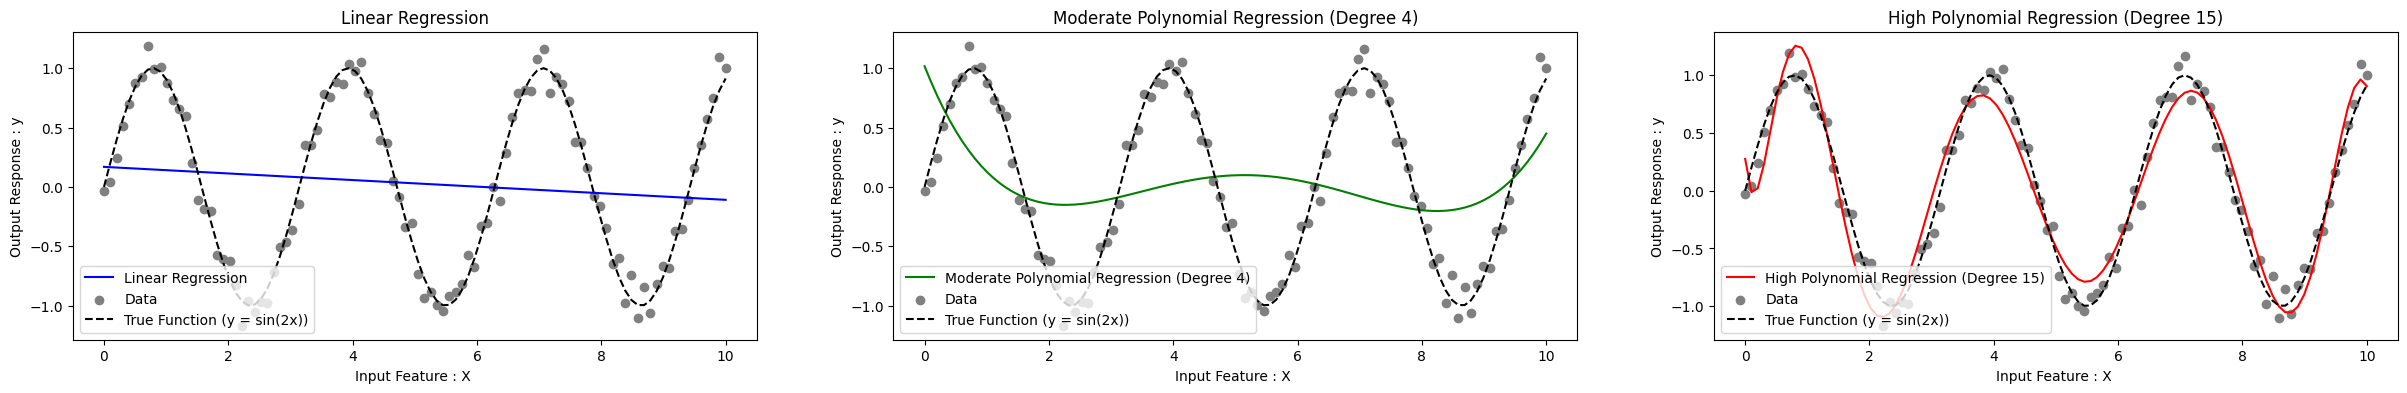

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define models with different complexities
models = [
    ("Linear Regression", make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),'blue'),
    ("Moderate Polynomial Regression (Degree 4)", make_pipeline(PolynomialFeatures(degree=4), LinearRegression()), 'green'),
    ("High Polynomial Regression (Degree 15)", make_pipeline(PolynomialFeatures(degree=10), LinearRegression()), 'red')
]

# Plot each model's predictions
plt.figure(figsize=(30, 4))
for i, (name, model, color) in enumerate(models):
    #Train the model
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i+1)
    plt.plot(X, y_pred, color=color, label=f'{name}')
    plt.title(name)
    plt.scatter(X, y, color='grey', label='Data')
    plt.plot(X, np.sin(2 * X), color='black',linestyle='--', label='True Function (y = sin(2x))')
    plt.xlabel('Input Feature : X ')
    plt.ylabel('Output Response : y')
    plt.legend(loc = 'lower left')

plt.show()


**Commentary:**
  *   **Linear Regression**: A simple model that assumes a straight-line relationship between X and  𝑦. It underfits the data, evident by its inability to capture the non-linear pattern.
  *   **Moderate Polynomial Regression** (Degree 4): A more complex model that captures the data pattern better (2nd plot), providing a good balance between bias and variance.
  *   **High Polynomial Regression** (Degree 15): A highly complex model that fits the training data very closely (3rd plot), including noise, indicating overfitting.
